In [1]:
# Note this code isn't on the main branch, need the `smoo` branch of cereeberus until I get this stuff onto the main branch.
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg
from cereeberus.compute.draw import line_loop_index

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as clr

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import networkx as nx
import numpy as np
import pandas as pd

# Note this code isn't on the main branch, need the `smoo` branch of cereeberus until I get this stuff onto the main branch.
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg
from cereeberus.compute.draw import line_loop_index

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as clr

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import networkx as nx
import numpy as np
import pandas as pd


%load_ext autoreload
%autoreload 2

In [2]:
cmap_binary = ListedColormap(["#B87BBC", "black",])
cmap_binary_2 = ListedColormap(['#743B75','#26B0E7','#F3A61B','#D94E3D'])
cmap_linear = clr.LinearSegmentedColormap.from_list('custom blue', ['#B87BBC','#26B0E7',], N=256)

# Testing torus/line

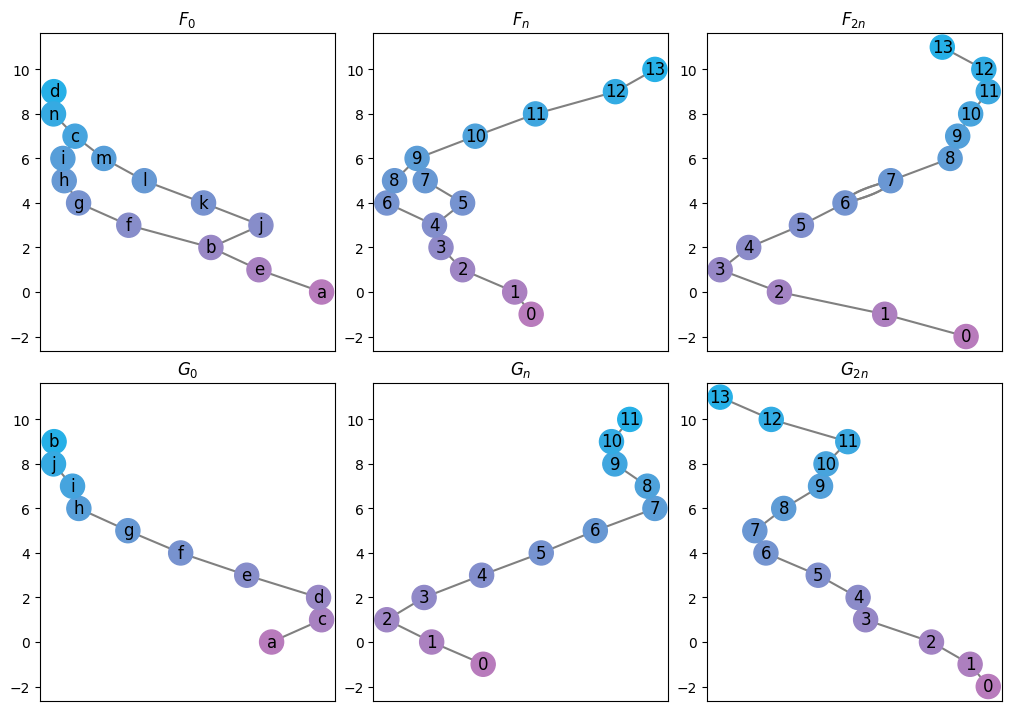

In [3]:
h = 5
T = ex_mg.torus(0,2, 2+h, 4+h, delta = 1)
L = ex_mg.line(0, 4+h)

myInt = Interleave(T, L, n=1, initialize_random_maps=True, seed = 0 )
myInt.draw_all_graphs(cmap = cmap_linear, figsize = (10,7), cpx = 1);

       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   0.0
3   Edge-Vertex   psi  down   1.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   1.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   1.0
11     Triangle     E     G   0.0

Loss: 1.0
Interleaving distance bound: 1 + 1.0 = 2.0


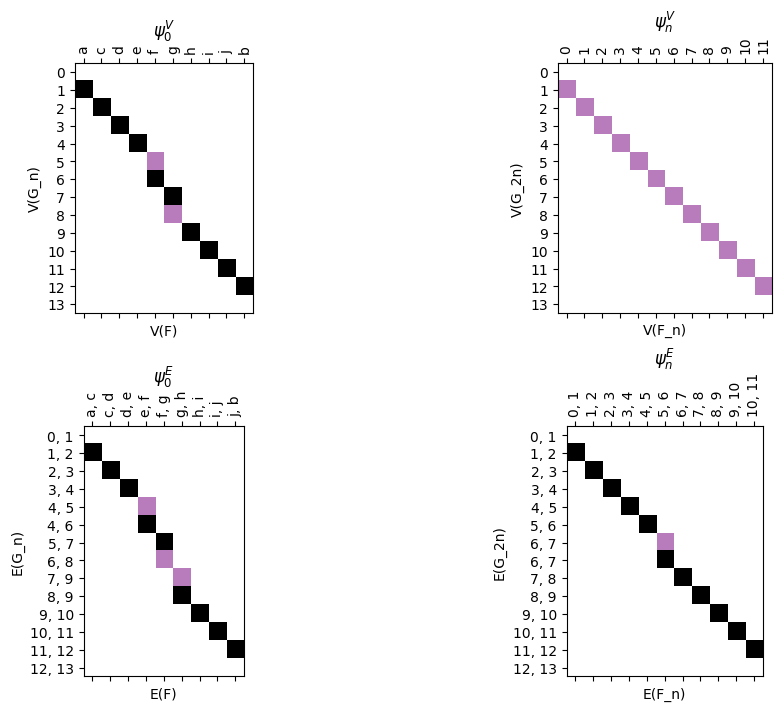

In [4]:
myIntT = Interleave(T, L, n=1, initialize_random_maps=True, seed = 0 )
myIntT.loss(verbose = True)
myIntT.draw_all_psi(filltype = 'nan', cmap = cmap_binary, figsize = (10,7));

       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   0.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   0.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   1.0
11     Triangle     E     G   0.0

Loss: 1.0
Interleaving distance bound: 1 + 1.0 = 2.0


1.0

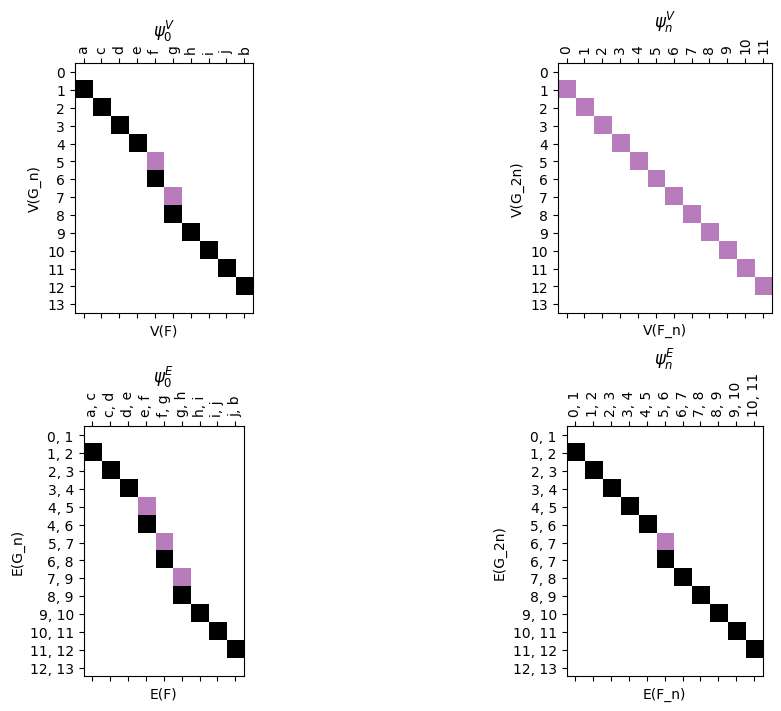

In [5]:
myIntT.set_single_assignment('f',6,'psi', '0','V')
myIntT.set_single_assignment('g',8,'psi', '0','V')
myIntT.set_single_assignment(('f','g'), (6,8),'psi', '0','E')
myIntT.set_single_assignment(('g','h'), (8,9),'psi', '0','E')
myIntT.draw_all_psi(filltype = 'nan', cmap = cmap_binary, figsize = (10,7));

myIntT.loss(verbose = True)

In [6]:
for label in (0,1):
    print(f"Mapping to {6,7, label}")

    myIntT.set_single_assignment((5,6,0), (6,7,label), 'psi', 'n','E')
    myInt.loss(verbose = True)

Mapping to (6, 7, 0)
       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   1.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   1.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   1.0
11     Triangle     E     G   0.0

Loss: 1.0
Interleaving distance bound: 1 + 1.0 = 2.0
Mapping to (6, 7, 1)
       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   1.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   1.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   1.0
11     Triangle     E     G   0.0

Loss: 1.0
Interleav

In [7]:
myIntL = Interleave(L,T, n=1, initialize_random_maps=True, seed = 0 )
# myIntL.loss(verbose = True)
# myIntL.draw_all_phi(filltype = 'nan', cmap = cmap_binary, figsize = (10,7));

       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   0.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   0.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   0.0
11     Triangle     E     G   1.0

Loss: 1.0
Interleaving distance bound: 1 + 1.0 = 2.0


1.0

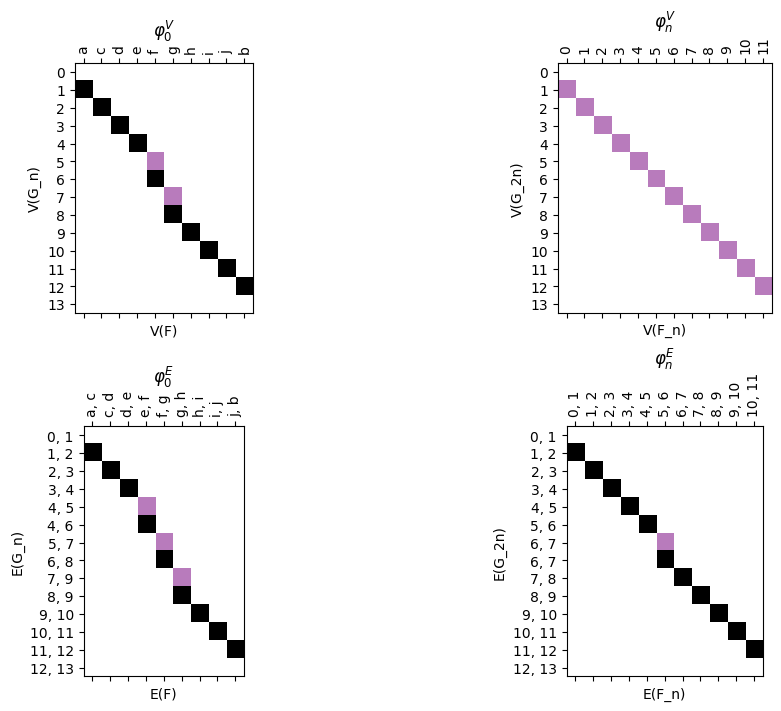

In [8]:
myIntL.set_single_assignment('f',6,'phi', '0','V')
myIntL.set_single_assignment('g',8,'phi', '0','V')
myIntL.set_single_assignment(('e','f'), (4,6),'phi', '0','E')
myIntL.set_single_assignment(('f','g'), (6,8),'phi', '0','E')
myIntL.set_single_assignment(('g','h'), (8,9),'phi', '0','E')
myIntL.draw_all_phi(filltype = 'nan', cmap = cmap_binary, figsize = (10,7));

myIntL.loss(verbose = True)

In [9]:
for label in (0,1):
    print(f"Mapping to {6,7, label}")

    myIntL.set_single_assignment((5,6,0), (6,7,label), 'phi', 'n','E')
    myIntL.loss(verbose = True)

Mapping to (6, 7, 0)
       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   0.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   1.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   0.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   0.0
11     Triangle     E     G   1.0

Loss: 1.0
Interleaving distance bound: 1 + 1.0 = 2.0
Mapping to (6, 7, 1)
       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   0.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   0.0
8      Triangle     V     F   0.0
9      Triangle     V     G   0.0
10     Triangle     E     F   0.0
11     Triangle     E     G   1.0

Loss: 1.0
Interleav